In [3]:
# ============ importar librerias a usar ============
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

## 1.FUNCIONES DE ACTIVACION

In [4]:
def escalon(x):
  if x > 0:
    return 1
  else:
    return 0


In [5]:
def sigmoide(x):
  # para que salga exactamente 0 o exactamente 1
  if x<=-10:
    return 0
  elif x >= 10:
    return 1
  else:
    return 1/(1+np.exp(-x))

In [6]:
escalon_vec = np.vectorize(escalon)
sigmoide_vec = np.vectorize(sigmoide)

# 2.RNA PERCEPTRON

In [7]:
# creando la neurona
def neurona(entradaX, pesosW1, biasB1, funcion="escalon"):
  # capa 1
  entrada_neta = np.dot(pesosW1,entradaX) + biasB1 # Z = W*X + b
  if funcion == "escalon":
    salida_C1 = escalon_vec(entrada_neta)  # f(Z)
  else:
    salida_C1 = sigmoide_vec(entrada_neta)
  return salida_C1[0] #salida

In [8]:
def ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias):
  for entrada, salida_deseada in zip(entradas,salidas):
    salida_obtenida = neurona(entrada, pesos, bias)
    error =  salida_deseada - salida_obtenida
    if error != 0: # ajustando pesos
      pesos += coef_aprendizaje*error*entrada
      bias += coef_aprendizaje*error*(1) # se pone -1 si el bias de la neurona es -bias para positivizarlos
  return pesos, bias # retorna  pesos y bias parciales


In [9]:
# perceptron fit
def entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas):
  n=len(entradas[0])
  pesos = np.array(2*np.random.rand(1,9)-1) # 9 entradas 1 neurona
  bias = 2*np.random.rand(1)-1
  for iter in range(epocas): # buscar pesos, bias
    pesos, bias = ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias)
  return pesos, bias #retorna pesos y bias optimo


# 3.LECTURA DE DATOS

In [10]:
df = pd.read_csv("cancer.csv")
df.head()

,EspesorGrupo,UniformidadTamano,UniformidadForma,AdhesionMarginal,TamanoCelular Epitelial,Nucleos Desnudos,Cromatina Blanda,Nucleo Normal,Mitosis,Clase
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EspesorGrupo             699 non-null    int64 
 1   UniformidadTamano        699 non-null    int64 
 2   UniformidadForma         699 non-null    int64 
 3   AdhesionMarginal         699 non-null    int64 
 4   TamanoCelular Epitelial  699 non-null    int64 
 5   Nucleos Desnudos         699 non-null    object
 6   Cromatina Blanda         699 non-null    int64 
 7   Nucleo Normal            699 non-null    int64 
 8   Mitosis                  699 non-null    int64 
 9   Clase                    699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [12]:
df.describe()

,EspesorGrupo,UniformidadTamano,UniformidadForma,AdhesionMarginal,TamanoCelular Epitelial,Cromatina Blanda,Nucleo Normal,Mitosis,Clase
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# 4.ANALISIS EXPLORATORIO DE DATOS

In [13]:
#matriz de scatterplots(gráficos de dispersión)
#sns.pairplot(data=df[df.columns[0:9]], diag_kws={'edgecolor':'k', 'bins':25}, plot_kws={'edgecolor':'k'})
#plt.show()

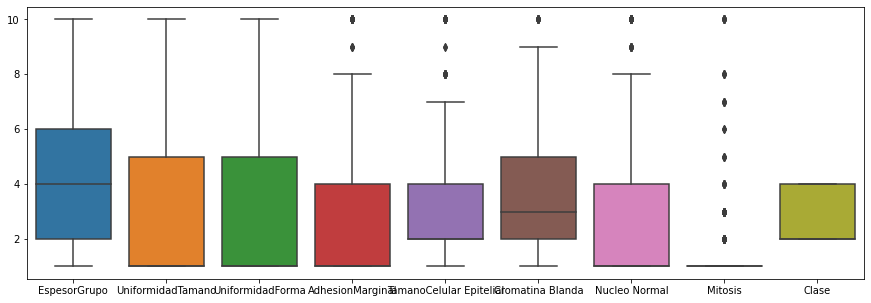

In [14]:
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

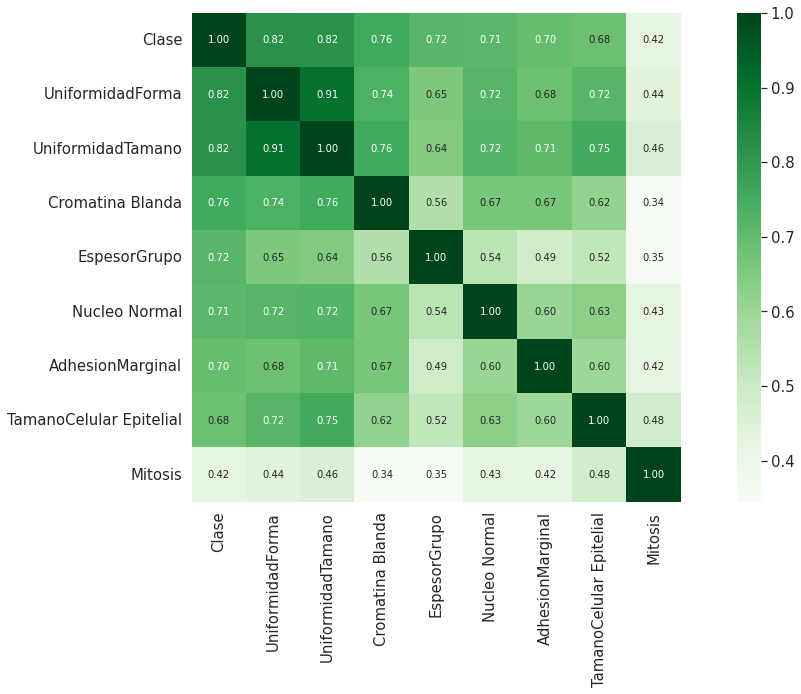

In [15]:
corr = df.corr()
plt.figure(figsize=(20, 9))
columnas = corr.nlargest(12 , 'Clase')['Clase'].index
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
plt.show()

# PREPROCESAMIENTO DE DATOS

In [16]:
df["Clase"].unique()

array([2, 4])

In [17]:
# convirtiendo a 1 y 0
df["Clase"].replace({2: 0, 4: 1}, inplace=True)

In [18]:
# ANALISIS DE DATOS EXPLORATORIO
df["Nucleos Desnudos"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '?', '8', '6'],
      dtype=object)

In [19]:
df["Nucleos Desnudos"].value_counts()

1     403
10    132
2      30
5      30
3      28
8      21
4      19
?      15
9       9
7       8
6       4
Name: Nucleos Desnudos, dtype: int64

In [29]:
# REEMPLAZANDO ? POR LA MODA
moda = df["Nucleos Desnudos"].mode()
df["Nucleos Desnudos"].replace({"?": moda[0]}, inplace=True)
df["Nucleos Desnudos"]=df["Nucleos Desnudos"].astype("int64")
df["Nucleos Desnudos"].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Nucleos Desnudos, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   EspesorGrupo             699 non-null    int64
 1   UniformidadTamano        699 non-null    int64
 2   UniformidadForma         699 non-null    int64
 3   AdhesionMarginal         699 non-null    int64
 4   TamanoCelular Epitelial  699 non-null    int64
 5   Nucleos Desnudos         699 non-null    int64
 6   Cromatina Blanda         699 non-null    int64
 7   Nucleo Normal            699 non-null    int64
 8   Mitosis                  699 non-null    int64
 9   Clase                    699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [21]:
#!pip install feature-engine

In [31]:
# TRATAMIENTO DE OUTLIERS
from feature_engine.outliers import Winsorizer

features = df.columns.to_list()
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=features[:-1]) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo 
windsoriser.fit(df)
# transformar en base a los datos entrenados
df = windsoriser.transform(df)

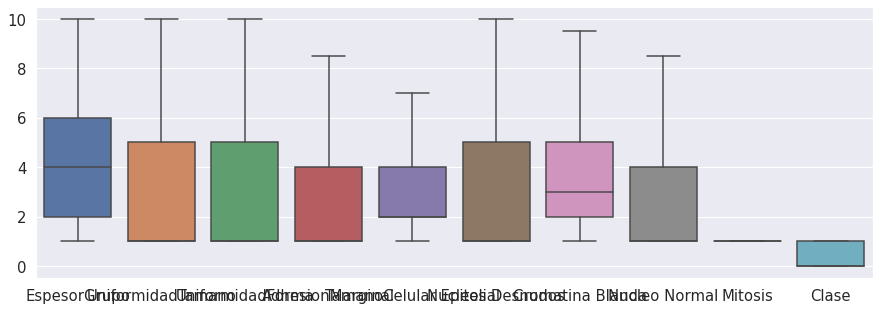

In [32]:
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

# 5.NORMALIZACION DE DATOS

In [33]:
X = df.drop("Clase", axis=1)
Y = df["Clase"]

scaler = preprocessing.StandardScaler()
scaler.fit(X)
# =========== TRANSFORMANDO =========== 
X = scaler.transform(X)

# 6.SEPARACION DE DATOS

In [34]:
# =========== SEPARACION DE DATOS =========== 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:
print("Tamaño del conjunto de entrenamiento", X_train.shape)
print("Tamaño del conjunto de prueba", X_test.shape)

Tamaño del conjunto de entrenamiento (559, 9)
Tamaño del conjunto de prueba (140, 9)


# 7.ENTRENAMIENTO

In [36]:
# modulo FIT
def fit_perceptron(entradas,salidas,coef_aprendizaje,epocas):
  pesos, bias = entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas)
  return pesos, bias

In [37]:
# FIT
pesos,bias = fit_perceptron(X_train,y_train, 0.2, 100)
print(pesos,bias)

[[0.36548419 0.81869771 0.94178807 0.24058512 0.3105506  0.57327293
  0.77700803 0.42736443 0.43957676]] [-0.27625545]


# 8.TEST RNA

In [77]:
def perceptron_predict(entradas):
  y_pred = []
  for entrada in entradas:
    probabilitie_result = neurona(entrada,pesos,bias,"sigmoide_vec")
    if probabilitie_result >= 0.70:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

In [78]:
y_pred=perceptron_predict(X_test)

In [79]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["Predict-YES", "Predict-NO"], index=["YES","NO"])

,Predict-YES,Predict-NO
YES,93,2
NO,3,42


# 9.METRICAS

In [80]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



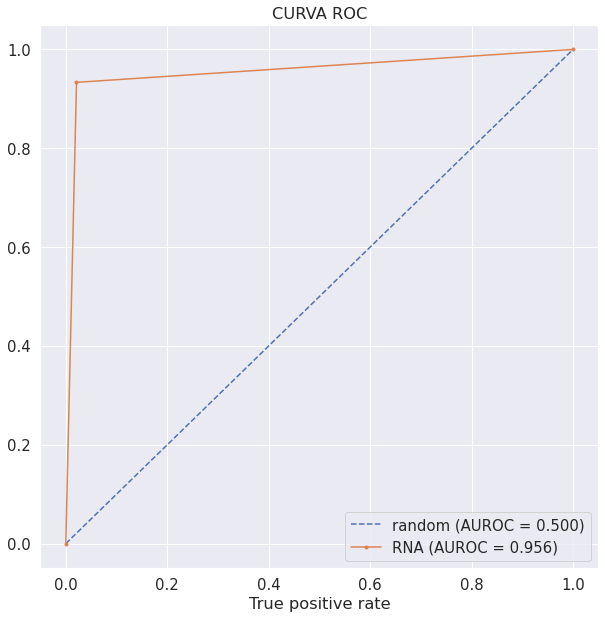

In [81]:
# Curva de ROC
from sklearn.metrics import roc_curve, roc_auc_score
models_probabilities=[]
models_probabilities.append(y_pred)

models_probs = []
models_fpr_tpr = []
for y_pred in models_probabilities:
  # Calculando auc score
  auc = roc_auc_score(y_test, y_pred)
  models_probs.append(auc)
  # Calculando la curva de ROC -> fpr,tpr
  model_fpr, model_tpr, _ = roc_curve(y_test, y_pred)
  models_fpr_tpr.append((model_fpr, model_tpr))

r_probs = [0 for _ in range(len(y_test))] # probabilidad de referencia base
models_probs.append(roc_auc_score(y_test, r_probs))
model_fpr_, model_tpr_, _ = roc_curve(y_test, r_probs)
models_fpr_tpr.append((model_fpr_, model_tpr_))

# graficando CURVA ROC

auc_RNA = models_probs[0]
auc_r = models_probs[1]

RNA_fpr, RNA_tpr = models_fpr_tpr[0]
r_fpr, r_tpr = models_fpr_tpr[1]

plt.figure(figsize=(10,10))

plt.plot(r_fpr, r_tpr,linestyle='--', label="random (AUROC = %0.3f)" % auc_r)
plt.plot(RNA_fpr, RNA_tpr,marker='.', label="RNA (AUROC = %0.3f)" % auc_RNA)

plt.title("CURVA ROC")
plt.xlabel("False positive rate")
plt.xlabel("True positive rate")

plt.legend()
plt.show()

# 10.SALVAR Y RECUPERAR VALORES(peso, bias) DEL MODELO DE RNA ENTRENADO

In [82]:
file_values = open("NRA_Cancer.txt","w")
for peso in pesos[0]:
  file_values.writelines(f"{peso}\n")
#file_values.writelines(f"{pesos[0]}")
file_values.write(f"{bias[0]}")
file_values.close()

In [83]:
# RECUPERAR VALORES DEL MODELO DE RNA

with open("NRA_Cancer.txt") as file_object:
  contents = file_object.readlines()
  
# extraer los datos en una lista  
values_saved = []
for value in contents:
  values_saved.append(float(value.rstrip('\n')))

In [84]:
weight_saved = np.array([values_saved[0:-1]])
bias_saved = values_saved[-1]

# 11.PREDICCION

In [90]:
def predecir(entrada,pesos,bias,funcion):
  result = neurona(entrada,pesos,bias,"sigmoide_vec")
  if result >= 0.70:
    value_predict=1
  else:
    value_predict=0
  return value_predict

In [89]:
def leer_datos():
  features = ['EspesorGrupo', 'UniformidadTamano', 'UniformidadForma',
              'AdhesionMarginal', 'TamanoCelular Epitelial', 'Nucleos Desnudos',
              'Cromatina Blanda', 'Nucleo Normal', 'Mitosis']
  data_input = []
  for feature in features:
    value = float(input(f"insert value of {feature}: "))
    data_input.append(value)
  return data_input

In [91]:
entrada = leer_datos()

insert value of EspesorGrupo: 3
insert value of UniformidadTamano: 4
insert value of UniformidadForma: 1
insert value of AdhesionMarginal: 1
insert value of TamanoCelular Epitelial: 3
insert value of Nucleos Desnudos: 2
insert value of Cromatina Blanda: 3
insert value of Nucleo Normal: 2
insert value of Mitosis: 1


In [93]:
entrada_df = np.array([entrada]) # convertir a array de numpy y lista de listas
# NORMALIZANDO LOS DATOS DE ENTRADA
entrada_df = scaler.transform(entrada_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [94]:
result = predecir(entrada_df[0],weight_saved,bias_saved,"sigmoide_vec")
if result == 1:
  print("POSITIVO A CANCER")
else:
  print("NEGATIVO A CANCER")

NEGATIVO A CANCER
